# Run the notebook

 You can either run the cells one at a time, or click the **Kernel** option above and select **Restart and Run All** to run all the cells.

# Load and explore data

In [57]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# Loading Training and test Data


In [58]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [59]:
<Insert Train data >


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0,1,50.0,75.0,14,1,22515,73.1,28,f,1173.84,0.0,0.0,0.0,0,74.0,INDIVIDUAL,NaN,26th week,0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0,1,NaN,NaN,6,0,7624,23.2,13,w,83.95,0.0,0.0,0.0,0,NaN,INDIVIDUAL,NaN,9th week,0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0,0,NaN,NaN,5,0,10877,31.2,19,w,56.47,0.0,0.0,0.0,0,NaN,INDIVIDUAL,NaN,9th week,0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0,2,46.0,NaN,10,0,13712,55.5,21,f,4858.62,0.0,0.0,0.0,0,NaN,INDIVIDUAL,NaN,135th week,0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0,0,NaN,NaN,11,0,35835,76.2,27,w,2296.41,0.0,0.0,0.0,0,NaN,INDIVIDUAL,NaN,96th week,0,0.0,47159.0,47033.0,0


In [60]:

<Insert test data >


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,4 years,RENT,73500.0,Source Verified,n,NaN,credit_card,wrap it up,450xx,OH,28.65,1,1,20.0,NaN,16,0,29828,65.3,53,f,3915.61,0.0,0.0,0.0,0,NaN,INDIVIDUAL,NaN,104th week,0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,5 years,MORTGAGE,105000.0,Source Verified,n,NaN,major_purchase,Major purchase,275xx,NC,31.19,0,0,NaN,NaN,8,0,4161,19.4,63,w,1495.06,0.0,0.0,0.0,0,NaN,INDIVIDUAL,NaN,57th week,0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,10+ years,RENT,62300.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,672xx,KS,21.73,1,0,23.0,115.0,11,1,12064,74.0,20,w,2096.21,0.0,0.0,0.0,0,26.0,INDIVIDUAL,NaN,70th week,0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,10+ years,OWN,150000.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,961xx,CA,17.27,0,0,NaN,NaN,21,0,32549,45.0,26,f,1756.31,0.0,0.0,0.0,0,NaN,INDIVIDUAL,NaN,22th week,0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,5 years,MORTGAGE,52000.0,Not Verified,n,NaN,major_purchase,Major purchase,707xx,LA,20.19,0,0,NaN,NaN,16,0,5133,19.2,36,w,172.21,0.0,0.0,0.0,0,NaN,INDIVIDUAL,NaN,22th week,0,0.0,234278.0,26700.0


In [61]:
# Number of unique classes in each object column
df_data_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                            2
batch_enrolled                 94
grade                           7
sub_grade                      35
emp_title                    6235
emp_length                     11
home_ownership                  5
verification_status             3
pymnt_plan                      1
desc                         1343
purpose                        14
title                        1224
zip_code                      793
addr_state                     49
initial_list_status             2
application_type                2
verification_status_joint       2
last_week_pay                  82
dtype: int64

In [62]:
# Find correlations with the target and sort
correlations = df_data_train.corr()['loan_status'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 collections_12_mths_ex_med    -0.038127
total_rev_hi_lim              -0.033426
acc_now_delinq                -0.029593
annual_inc                    -0.006729
tot_coll_amt                  -0.006463
total_acc                     -0.000284
total_rec_late_fee             0.001199
int_rate                       0.004842
mths_since_last_major_derog    0.008488
tot_cur_bal                    0.008791
total_rec_int                  0.041528
mths_since_last_delinq         0.049393
inq_last_6mths                 0.095417
mths_since_last_record         0.096537
loan_status                    1.000000
Name: loan_status, dtype: float64

Most Negative Correlations:
 member_id                    -0.487552
dti                          -0.134161
funded_amnt_inv              -0.107810
funded_amnt                  -0.103922
loan_amnt                    -0.102357
open_acc                     -0.072806
recoveries                   -0.068977
delinq_2yrs                  -0.05

# Data Preprocessing

def handle_specific_non_numeric_data(df):
    
    df['term'] = df['term'].str.extract('(\d+)', expand=True).astype('float', copy=False)
    df['emp_length'].replace(to_replace='< 1', value='0', regex=True, inplace=True)
    df['emp_length'] = df['emp_length'].str.extract('(\d+)', expand=True).astype('float', copy=False)
    df['last_week_pay'] = df['last_week_pay'].str.extract('(\d+)', expand=True).astype('float', copy=False)
    df = df.drop(['emp_title', 'desc','batch_enrolled','sub_grade','title','zip_code'], axis=1)
    return df

df_data_train = handle_specific_non_numeric_data(df_data_train)
df_data_test = handle_specific_non_numeric_data(df_data_test)
# Number of unique classes in each object column
df_data_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df_data_train:
    if df_data_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df_data_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(df_data_train[col])
            print('%d Column label encoded:', col, df_data_train[col].unique())
            # Transform both training and testing data
            df_data_train[col] = le.transform(df_data_train[col])
            df_data_test[col] = le.transform(df_data_test[col]) 
            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)
# Number of unique classes in each object column  

In [63]:
df_data_train.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0,1,50.0,75.0,14,1,22515,73.1,28,f,1173.84,0.0,0.0,0.0,0,74.0,INDIVIDUAL,NaN,26th week,0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0,1,NaN,NaN,6,0,7624,23.2,13,w,83.95,0.0,0.0,0.0,0,NaN,INDIVIDUAL,NaN,9th week,0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0,0,NaN,NaN,5,0,10877,31.2,19,w,56.47,0.0,0.0,0.0,0,NaN,INDIVIDUAL,NaN,9th week,0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0,2,46.0,NaN,10,0,13712,55.5,21,f,4858.62,0.0,0.0,0.0,0,NaN,INDIVIDUAL,NaN,135th week,0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0,0,NaN,NaN,11,0,35835,76.2,27,w,2296.41,0.0,0.0,0.0,0,NaN,INDIVIDUAL,NaN,96th week,0,0.0,47159.0,47033.0,0


In [64]:
# one-hot encoding of categorical variables
df_data_train = pd.get_dummies(df_data_train)
df_data_test = pd.get_dummies(df_data_test)

print('Training Features shape: ', df_data_train.shape)
print('Testing Features shape: ', df_data_test.shape)

Training Features shape:  (9999, 9931)
Testing Features shape:  (9999, 10052)


In [65]:
train_labels = df_data_train['loan_status']

# Align the training and testing data, keep only columns present in both dataframes
df_data_train, df_data_test = df_data_train.align(df_data_test, join = 'inner', axis = 1)

# Add the target back in
df_data_train['loan_status'] = train_labels

print('Training Features shape: ', df_data_train.shape)
print('Testing Features shape: ', df_data_test.shape)

Training Features shape:  (9999, 2283)
Testing Features shape:  (9999, 2282)


In [66]:
# Find correlations with the target and sort
correlations = df_data_train.corr()['loan_status'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 last_week_pay_0th week              0.075653
last_week_pay_30th week             0.077244
verification_status_Not Verified    0.079432
title_Debt Consolidation Loan       0.086031
last_week_pay_82th week             0.088510
inq_last_6mths                      0.095417
mths_since_last_record              0.096537
title_Debt Consolidation            0.120514
term_36 months                      0.137240
last_week_pay_157th week            0.158773
last_week_pay_161th week            0.167282
last_week_pay_156th week            0.199090
initial_list_status_f               0.223556
loan_status                         1.000000
pymnt_plan_n                             NaN
Name: loan_status, dtype: float64

Most Negative Correlations:
 member_id                             -0.487552
initial_list_status_w                 -0.223556
title_Debt consolidation              -0.221151
term_60 months                        -0.137240
dti                                   -0

In [67]:
from sklearn.model_selection import train_test_split

train_target = df_data_train['loan_status']
df_data_train = df_data_train.drop(columns = ['loan_status'])

# Split data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(df_data_train,train_target, test_size=0.2, random_state=0 )


print('Training Features shape: ', X_train.shape)
print('Testing Features shape: ', X_test.shape)

Training Features shape:  (7999, 2282)
Testing Features shape:  (2000, 2282)


In [68]:
from sklearn.preprocessing import MinMaxScaler, Imputer


train = X_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = X_test.copy()
test_f = df_data_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)
test_f = imputer.transform(test_f)

# Scale each feature to 0-1
#scaler = MinMaxScaler(feature_range = (0, 1))
# Repeat with the scaler
#scaler.fit(train)
#train = scaler.transform(train)
#test = scaler.transform(test)
#test_f = scaler.transform(test_f)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)
print('Testing data shape: ', test_f.shape)

Training data shape:  (7999, 2282)
Testing data shape:  (2000, 2282)
Testing data shape:  (9999, 2282)


In [69]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
reg_params = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for reg_param in reg_params:
    log_reg = LogisticRegression(C = reg_param)
    # Train on the training data
    log_reg.fit(train, y_train)
    # Make predictions
    y_pred = log_reg.predict(test)
    print("Regularization parameter: ", reg_param)
    print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(log_reg.score(test, y_test)))
    print()

Regularization parameter:  0.05
Accuracy of logistic regression classifier on test set: 0.823

Regularization parameter:  0.1
Accuracy of logistic regression classifier on test set: 0.823

Regularization parameter:  0.25
Accuracy of logistic regression classifier on test set: 0.823

Regularization parameter:  0.5
Accuracy of logistic regression classifier on test set: 0.823

Regularization parameter:  0.75
Accuracy of logistic regression classifier on test set: 0.823

Regularization parameter:  1
Accuracy of logistic regression classifier on test set: 0.823



In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

def show_and_print_roc_auc(y_test, y_pred, classifier):
    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test,y_pred)
    plt.figure()
    plt.plot(fpr, tpr, label= classifier + ' (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
log_reg = LogisticRegression(C = 0.75)
 # Train on the training data
lreg_model = log_reg.fit(train, y_train)
y_pred_lreg = log_reg.predict(test)

Accuracy of logistic regression classifier on test set: 0.823
Confusion Matrix:
[[1469   67]
 [ 287  177]]

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      1536
           1       0.73      0.38      0.50       464

   micro avg       0.82      0.82      0.82      2000
   macro avg       0.78      0.67      0.70      2000
weighted avg       0.81      0.82      0.80      2000



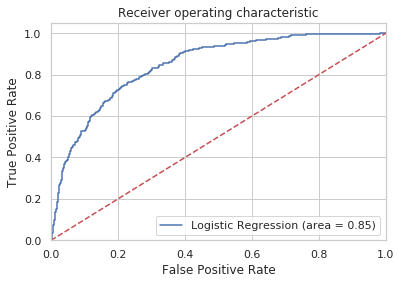

In [72]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(log_reg.score(test, y_test)))
confusion_matrix = confusion_matrix(y_test, y_pred_lreg)

print("Confusion Matrix:")
print(confusion_matrix)
print()
print("Classification Report")
print(classification_report(y_test, y_pred_lreg))

show_and_print_roc_auc(y_test, log_reg.predict_proba(test)[:, 1], 'Logistic Regression')

In [73]:
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.771
Accuracy score (validation): 0.768

Learning rate:  0.1
Accuracy score (training): 0.771
Accuracy score (validation): 0.768

Learning rate:  0.25
Accuracy score (training): 0.771
Accuracy score (validation): 0.768

Learning rate:  0.5
Accuracy score (training): 0.772
Accuracy score (validation): 0.768

Learning rate:  0.75
Accuracy score (training): 0.772
Accuracy score (validation): 0.767

Learning rate:  1
Accuracy score (training): 0.772
Accuracy score (validation): 0.767



In [74]:
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=500, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb_model = gb.fit(train, y_train)
pred_gb = gb.predict(test)

Accuracy score (validation): 0.785


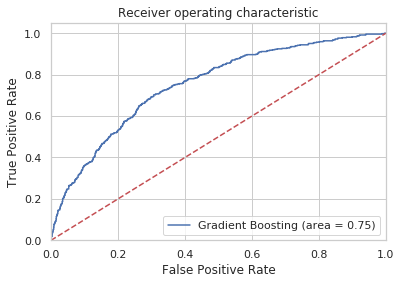

In [75]:
print("Accuracy score (validation): {0:.3f}".format(gb.score(test, y_test)))
show_and_print_roc_auc(y_test, gb.predict_proba(test)[:, 1], 'Gradient Boosting')

In [76]:
!rm -rf $PIP_BUILD/watson-machine-learning-client
!pip install watson-machine-learning-client --upgrade
from watson_machine_learning_client import WatsonMachineLearningAPIClient

Requirement already up-to-date: watson-machine-learning-client in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.0.375)


 *you will need credentials for Watson Machine Learning. If you already have a WML instance, you may use credentials for it. To provision a new Lite instance of WML, use the [IBM Cloud catalog](https://cloud.ibm.com/catalog/services/machine-learning):  
* Give your service a name, and click **Create**.  
* Once your instance is created, click the **Service Credentials** link on the left side of the screen.  
* Click the **New credential** button, give your credentials a name, and click **Add**.  
* Your new credentials can be accessed by clicking the **View credentials** button.  
* Copy and paste your WML credentials into the cell below.

In [80]:
wml_credentials = {
  <Insert WML credentials >
}

In [81]:
import json
client = WatsonMachineLearningAPIClient(wml_credentials)
instance_details = client.service_instance.get_details()



In [83]:
#published_model = client.repository.store_model(model=lreg_model, meta_props={'name':'Loan Default Predictor - logistic regression'}, training_data=train, training_target=train_target)
#published_model = client.repository.store_model(model=gb_model, meta_props={'name':'Loan Default Predictor - Gradient Boosting'}, training_data=train, training_target=train_target)
published_model = client.repository.store_model(model=gb_model, meta_props={'name':'Loan Default Predictor'}, training_data=train, training_target=train_target)
published_model_uid = client.repository.get_model_uid(published_model)
model_details = client.repository.get_details(published_model_uid)

print(json.dumps(model_details, indent=2))

{
  "metadata": {
    "guid": "6ac1a6c7-5316-4807-847d-23ec8fef6c4b",
    "url": "https://us-south.ml.cloud.ibm.com/v3/wml_instances/084b11f3-c072-4d12-b7a3-ec806f3500e3/published_models/6ac1a6c7-5316-4807-847d-23ec8fef6c4b",
    "created_at": "2019-09-26T07:40:37.015Z",
    "modified_at": "2019-09-26T07:40:37.190Z"
  },
  "entity": {
    "runtime_environment": "python-3.6",
    "learning_configuration_url": "https://us-south.ml.cloud.ibm.com/v3/wml_instances/084b11f3-c072-4d12-b7a3-ec806f3500e3/published_models/6ac1a6c7-5316-4807-847d-23ec8fef6c4b/learning_configuration",
    "name": "Loan Default Predictor - Random Forest",
    "label_col": "loan_status",
    "learning_iterations_url": "https://us-south.ml.cloud.ibm.com/v3/wml_instances/084b11f3-c072-4d12-b7a3-ec806f3500e3/published_models/6ac1a6c7-5316-4807-847d-23ec8fef6c4b/learning_iterations",
    "training_data_schema": {
      "features": {
        "type": "ndarray",
        "fields": [
          {
            "name": "f0",
   

In [84]:
models_details = client.repository.list_models()

------------------------------------  --------------------------------------  ------------------------  -----------------
GUID                                  NAME                                    CREATED                   FRAMEWORK
6ac1a6c7-5316-4807-847d-23ec8fef6c4b  Loan Default Predictor - Random Forest  2019-09-26T07:40:37.015Z  scikit-learn-0.20
870724d8-30c1-4826-b417-e49d7ae822fb  Loan Default Predictor - Random Forest  2019-09-26T07:39:57.461Z  scikit-learn-0.20
------------------------------------  --------------------------------------  ------------------------  -----------------


In [85]:
loaded_model = client.repository.load(published_model_uid)

In [86]:
test_predictions = loaded_model.predict(test_f)

In [87]:
prediction_df = pd.DataFrame( df_data_test['member_id'], columns=['member_id'])
prediction_df['predictions'] = test_predictions

In [88]:
print(prediction_df)
prediction_file = prediction_df.to_csv('predictions.csv')

      member_id  predictions
0      11937648            0
1      38983318            0
2      27999917            0
3      61514932            0
4      59622821            0
5      28822038            0
6      10718089            0
7      58114582            0
8      35023176            0
9       1268247            1
10     15559751            0
11     41234300            0
12     53958774            0
13      8074949            0
14     67601509            0
15     65560239            0
16     14767770            0
17      1726792            0
18      9899439            0
19     15120294            0
20     12019444            0
21     35242810            0
22      1057101            1
23     23024164            0
24     45430320            0
25     46396580            0
26     58832624            0
27     14990008            0
28     57738287            0
29     66382471            0
...         ...          ...
9969   70360280            0
9970    1435223            1
9971   1106837

In [ ]:
## Congratulations!

#You have finished the hands-on lab for IBM Watson Studio and Watson Machine Learning (WML) based predictive model for the given dataset